In [308]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [309]:
# method to read data from excel file
def read_plane_data(file_name):
    df_planes = pd.read_excel(file_name)
    return df_planes

df = read_plane_data('airplane data.xlsx')

print('Here are your plane choices:')
print(df['aircraft_type'])

Here are your plane choices:
0                        A220-300
1              Bombardier CRJ-900
2                Beechcraft 1900D
3            Boeing 737-300 (733)
4      Airbus A319 (319) Layout 1
5    Embraer E-175 (E75) Layout 1
6           Airbus A320-200 (320)
7         Boeing 737-700 Layout 2
8                ATR 72-600 (ATR)
9            Boeing 717-200 (717)
Name: aircraft_type, dtype: object


In [310]:
plane_choice = input("Input the number corresponding to the plane you'd like to simulate:")    

Input the number corresponding to the plane you'd like to simulate: 5


In [311]:
plane_type = df.loc[int(plane_choice)].at['aircraft_type']
print('You selected:', plane_type)

You selected: Embraer E-175 (E75) Layout 1


In [373]:
def seat_params_info(df, plane_num):
    """Function to gather information from table regarding seat dimensions and return a list of tuples."""
    seat_width_economy = df.loc[int(plane_num)].at['seat width - economy']
    seat_pitch_economy = df.loc[int(plane_num)].at['seat depth - economy']
    seat_param_economy = seat_width_economy, seat_pitch_economy

    seat_width_business = df.loc[int(plane_num)].at['seat width - business']
    seat_pitch_business = df.loc[int(plane_num)].at['seat depth - business']
    seat_param_business = seat_width_business, seat_pitch_business

    seat_width_1stclass = df.loc[int(plane_num)].at['seat width - first class']
    seat_pitch_1stclass = df.loc[int(plane_num)].at['seat depth - first class']
    seat_param_1stclass = seat_width_1stclass, seat_pitch_1stclass

    seat_params = [seat_param_economy, seat_param_business, seat_param_1stclass]

    return seat_params

seat_params_info(df, plane_choice)

[(18.25, 31), (18.25, 34.0), (20.0, 37.0)]

In [313]:
def num_of_seats_info(df, plane_num):
    """Function to gather information from table regarding number of seats and return a tuple."""
    econ = df.at[int(plane_num), "total seats - economy"]
    bus = df.at[int(plane_num), "total seats - business"]
    first = df.at[int(plane_num), "total seats - first class"]
    
    num_of_seats = econ, bus, first

    return num_of_seats

num_of_seats_info(df, plane_choice)

(76, 12.0, 12)

In [314]:
def seat_arrange_info(df, plane_num):
    """Function to gather information from table regarding seat arrangement and return a list."""
    seat_arrange_econ = df.loc[int(plane_num)].at['seat arrangement - economy']

    seat_arrange_bus = df.loc[int(plane_num)].at['seat arrangement - business']
    
    seat_arrange_1st = df.loc[int(plane_num)].at['seat arrangement - first class']
    
    seat_arrange = [seat_arrange_econ, seat_arrange_bus, seat_arrange_1st]

    return seat_arrange

seat_arrange_info(df, plane_choice)

['2 2', '2 2', '1 2']

In [491]:
class Seat:
    def __init__(self, seat_label, class_type):
        self.letter = seat_label[0]
        self.row = int(seat_label[1:])
        self.class_type = class_type
        self.occupied = False

In [561]:
from Cell2D import Cell2D

class Plane(Cell2D):
    def __init__(self, seat_params, num_of_seats, seat_arrange):
        """
        Initializing seat dimensions, number of seats for each 'class' of plane, and the seat arrangement
        in each 'class' of the plane from the tuple or list passed to the __init__ method for each 
        corresponding characteristic of the plane.
        """
        # Store seat parameters (width, pitch) for each class
        self.seat_param_economy = seat_params[0]
        self.seat_param_business = seat_params[1]
        self.seat_param_firstclass = seat_params[2]

        # Store number of seats in each class
        self.num_of_seats_economy = num_of_seats[0]
        self.num_of_seats_business = num_of_seats[1]
        self.num_of_seats_firstclass = num_of_seats[2]

        # Store seat arrangement strings for each class
        self.seat_arrange_economy = seat_arrange[0]
        self.seat_arrange_business = seat_arrange[1]
        self.seat_arrange_firstclass = seat_arrange[2]

        self.seats = []

    def generate_seat_labels(self, starting_row, num_of_rows, seats_per_row):
        seat_labels = []
        for row in range(starting_row, num_of_rows + starting_row):
            for seat in range(seats_per_row):
                seat_letter = chr(64 + seats_per_row - seat)  # 'A', 'B', etc.
                seat_labels.append(f"{seat_letter}{row}")
        return seat_labels[::-1]

    def draw_sect_of_plane(self, ax, seat_type, starting_row, class_type):
        """
        Method to draw a section of the plane from the information passed to the method.
        The seat_type parameter is a tuple with the data stored as:
        (seats per column list, seats per row, number of rows, seat width, seat pitch)
        """
        seats_per_col, seats_per_row, num_of_rows, seat_width, leg_room, aisle_gap, start_y = seat_type
        leg_room -= seat_width
        seat_depth = 18*0.2  # Fixed depth of seat

        seat_labels = self.generate_seat_labels(starting_row, num_of_rows, seats_per_row)
        label_index = 0

        y = start_y  # Starting vertical position
        padding = 1
        
        for row in range(num_of_rows):
            x = 0  # Reset horizontal position for each row
            
            # Draw seats on the left side of the aisle
            for seat in range(seats_per_col[0]):
                rect = patches.Rectangle((x, y), seat_depth, seat_width, edgecolor='black', facecolor='lightskyblue')
                ax.add_patch(rect)
                label = seat_labels[label_index]
                ax.text(x + seat_depth / 2, y + seat_width / 2, label, ha='center', va='center', fontsize=6)
                self.seats.append(Seat(label, class_type))
                label_index += 1
                x += seat_depth + padding

            # Make aisle
            x += aisle_gap

            # Draw seats on the right side of the aisle
            for seat in range(seats_per_col[2]):
                rect = patches.Rectangle((x, y), seat_depth, seat_width, edgecolor='black', facecolor='lightskyblue')
                ax.add_patch(rect)
                label = seat_labels[label_index]
                ax.text(x + seat_depth / 2, y + seat_width / 2, label, ha='center', va='center', fontsize=6)
                self.seats.append(Seat(label, class_type))
                label_index += 1
                x += seat_depth + padding
            
            # Move to the next row
            y += leg_room + seat_width

    def draw_plane_find_parameters(self, seat_dims, seat_arrangement, num_of_seats):
        """
        This method extracts useful data to obtain:
        seats per column, seats per row, number of rows, seat width, and seat pitch.
        Returns a tuple to be passed as a parameter to draw_sect_of_plane.
        """
        seats_per_col = seat_arrangement.split(' ')  # Split arrangement string into list
            
        for i, num in enumerate(seats_per_col):
            seats_per_col[i] = int(num)  # Convert to integers

        dummy_var = seats_per_col[len(seats_per_col)//2]  # Extract center value
        seats_per_col[len(seats_per_col)//2] = 0  # Replace center value with 0
        seats_per_col.append(dummy_var)  # Append center value to the end

        seats_in_row = sum(seats_per_col)  # Total seats in a row
        num_of_rows = math.ceil(num_of_seats/seats_in_row)  # Calculate number of rows

        seat_width = seat_dims[0] * 0.2  # Scale seat width
        leg_room = seat_dims[1] * 0.2    # Scale seat pitch

        return seats_per_col, seats_in_row, num_of_rows, seat_width, leg_room
    
    def draw_plane(self):
        """
        This method calls other methods in the Plane class to gather the data needed
        to draw each class of the plane, and then draws each section.
        """
        fig, ax = plt.subplots()
        padding = 1
        
        econ_draw_inputs = None
        bus_draw_inputs = None
        first_draw_inputs = None

        econ_y = 0
        business_y = 0
        first_y = 0

        # Economy class section
        economy_class = self.draw_plane_find_parameters(self.seat_param_economy, self.seat_arrange_economy, self.num_of_seats_economy)
        econ_y = economy_class[2] * (economy_class[4])  # Update vertical position
        plane_width = economy_class[3] * (economy_class[1] + padding) +5  # Estimate plane width
        econ_extra_inputs = 5, 0
        econ_draw_inputs = economy_class + econ_extra_inputs
        total_rows = economy_class[2]

        # Business class section
        if self.num_of_seats_business > 0:
            business_class = self.draw_plane_find_parameters(self.seat_param_business, self.seat_arrange_business, self.num_of_seats_business)
            fixer = 0
            if business_class[1] != economy_class[1]:  # Align business class with economy if needed
                fixer = (economy_class[1] - business_class[1]) * (18*0.2 - padding)
            business_width = business_class[3] * (business_class[1] + padding)
            business_aisle_width = plane_width - business_width + fixer
            bus_extra_inputs = business_aisle_width, econ_y
            bus_draw_inputs = business_class + bus_extra_inputs
            total_rows += business_class[2]
            business_y = econ_y + business_class[2] * (business_class[4])
            
        # First class section        
        if self.num_of_seats_firstclass > 0:
            first_class = self.draw_plane_find_parameters(self.seat_param_firstclass, self.seat_arrange_firstclass, self.num_of_seats_firstclass)
            fixer = 0
            if first_class[1] != economy_class[1]:  # Align first class with economy if needed
                fixer = (economy_class[1] - first_class[1]) * (18*0.2 - padding)
            first_class_width = first_class[3] * (first_class[1] + padding)
            first_class_aisle_width = plane_width - first_class_width + fixer
            total_rows += first_class[2]
            if business_y == 0:
                first_extra_inputs = first_class_aisle_width, econ_y
                first_draw_inputs = first_class + first_extra_inputs
            else:
                first_extra_inputs = first_class_aisle_width, business_y
                first_draw_inputs = first_class + first_extra_inputs
            
            first_y = business_y + first_class[2] * (first_class[4])

        # generate seat labels
        starting_row = 1
        if self.num_of_seats_firstclass > 0:
            self.draw_sect_of_plane(ax, first_draw_inputs, starting_row, "first class")
            starting_row += first_class[2]

        if self.num_of_seats_business > 0:
            self.draw_sect_of_plane(ax, bus_draw_inputs, starting_row, "business class")
            starting_row += business_class[2]
            
        self.draw_sect_of_plane(ax, econ_draw_inputs, starting_row, "economy class")
        
        self.plane_length = first_y
        
        # Set figure size and display
        fig.set_size_inches((plane_width + 5) * 0.1, self.plane_length * 0.1)
        plt.axis('equal')
        plt.axis('off')
        plt.show()

In [417]:
class Passenger:
    def __init__(self, current_row_location):
        self.seat_letter = None
        self.row_num = None
        self.current_row_location = current_row_location
        self.speed = 1
        self.status = "not seated"

In [413]:
class PlaneBoarding(Cell2D):
    def __init__(self, num_of_passengers, plane, constructor = Passenger):
        self.plane = plane
        # Start passengers just outside the plane 
        start_positions = np.linspace(self.plane.plane_length, self.plane.plane_length + num_of_passengers, num_of_passengers, endpoint=False)
        self.passengers = [constructor(pos) for pos in start_positions]

        # link them up in a list
        for i in range(n):
            self.passengers[i].next = self.passengers[i+1]

    def find_aisle(self):
        economy_class = self.plane.draw_plane_find_parameters(self.plane.seat_param_economy, self.plane.seat_arrange_economy, 
                                                              self.plane.num_of_seats_economy)
        x_aisle_coord = (economy_class[3] * (economy_class[1] + padding) +5)/2

        return x_aisle_coord
        
    def step(self):
        previous_passenger = None
        for passenger in self.passengers:
            self.move(previous_passenger, passenger)
            previous_passenger = passenger

    def move(self, previous_passenger, passenger):
        if self.status == "not seated":
            # find seat
            if (passenger.row_location < passenger.row_num):
                # if person in front of yous speed != 0, move forward one seat
                if (previous_passenger.speed != 0):
                    passenger.current_row_location += passenger.speed
                elif (previous_passenger.speed == 0) && previous_passenger.status == "not seated":
                    # don't update current_row_location
                # if person in front of yous speed == 0 and they are seated then move forward one seat
                elif (previous_passenger.speed == 0) && previous_passenger.status == "seated":
                    passenger.speed = 1
            elif (passenger.row_location == passenger.row_num):
                # set speed to zero
                passenger.speed = 0
                # go to seat
                    # check if other people are in the row and have to get out for you to get to your seat
                    # move side ways by number of seats from aisle + 18*0.2/2
                # change status to seated
                self.status == "seated"
    
    def draw_passengers(self, width, plane_length):
        x = self.find_aisle()
        
        passengers = self.passengers
        plt.plot(x, plane_length, 'bs', markersize=10, alpha=0.7)

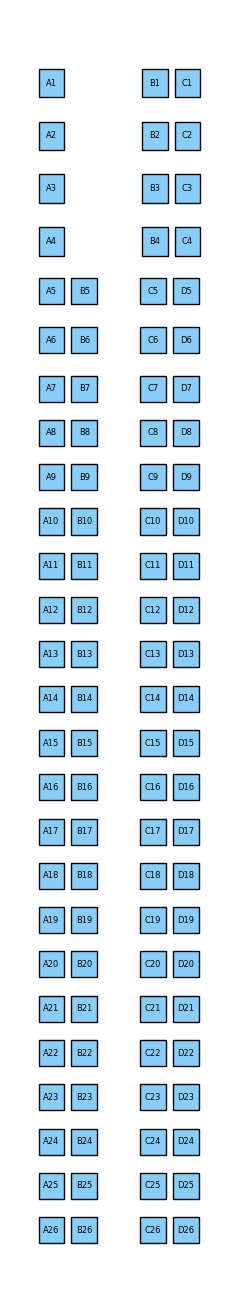

In [559]:
plane = Plane(seat_params_info(df, plane_choice), num_of_seats_info(df, plane_choice), seat_arrange_info(df, plane_choice))

plane.draw_plane()